In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 8
plt.rcParams["figure.autolayout"] = True # same as tight_layout after every plot

from swifd import SwiModel

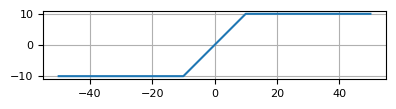

In [3]:
nlay = 1
ncol = 21
delx = 5
zb = -10
zt = 10
k, S, Se = 10, 0.2, 0.0001
rhof = 1000
rhos = 1025
alphaf = rhof / (rhos - rhof)
alphas = rhos / (rhos - rhof)
nstep = 50
delt = 5
xc = np.linspace(-(ncol - 1) / 2 * delx, (ncol - 1) / 2 * delx, ncol)
xleft = -10
xright = 10
zetaini = np.zeros(ncol)
zetaini[xc < -10] = -10
zetaini[xc > 10] = 10
zetaini[(xc >= -10) & (xc <= 10)] = xc[(xc >= -10) & (xc <= 10)]
plt.subplot(111, aspect=1)
plt.plot(xc, zetaini)
hsini = 20 * np.ones(ncol) # set so that hfini > zt everywhere (i.e., confined flow)
hfini = alphas / alphaf * hsini - zetaini / alphaf
plt.grid()

$$\zeta = \alpha_s h_s - \alpha_f h_f$$
$$h_f = \frac{\alpha_s}{\alpha_f}h_s - \frac{\zeta}{\alpha_f}$$

In [4]:
ml = SwiModel(nlay, ncol, delx, xleftc=-50)
ml.tdis(nstep=nstep, delt=delt, hfini=hfini, hsini=hsini)
ml.aquifer(k, S=S, Se=Se, zb=zb, zt=zt, rhof=rhof, rhos=rhos)
hf, hs, zeta = ml.simulate(silent=True)

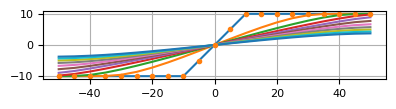

In [5]:
plt.subplot(111, aspect=1)
for i in range(0, nstep + 1, 5):
    plt.plot(ml.xc, zeta[i, 0])
plt.plot(ml.xc, zetaini, '.')
plt.grid()